In [1]:
from statsmodels import api as sm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as manimation
import os
from PIL import Image

plt.style.use('seaborn-poster')

/var/folders/kv/9cqw3y_s6c75xmgqm9n0t5d40000gn/T/ipykernel_59534/3199581857.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


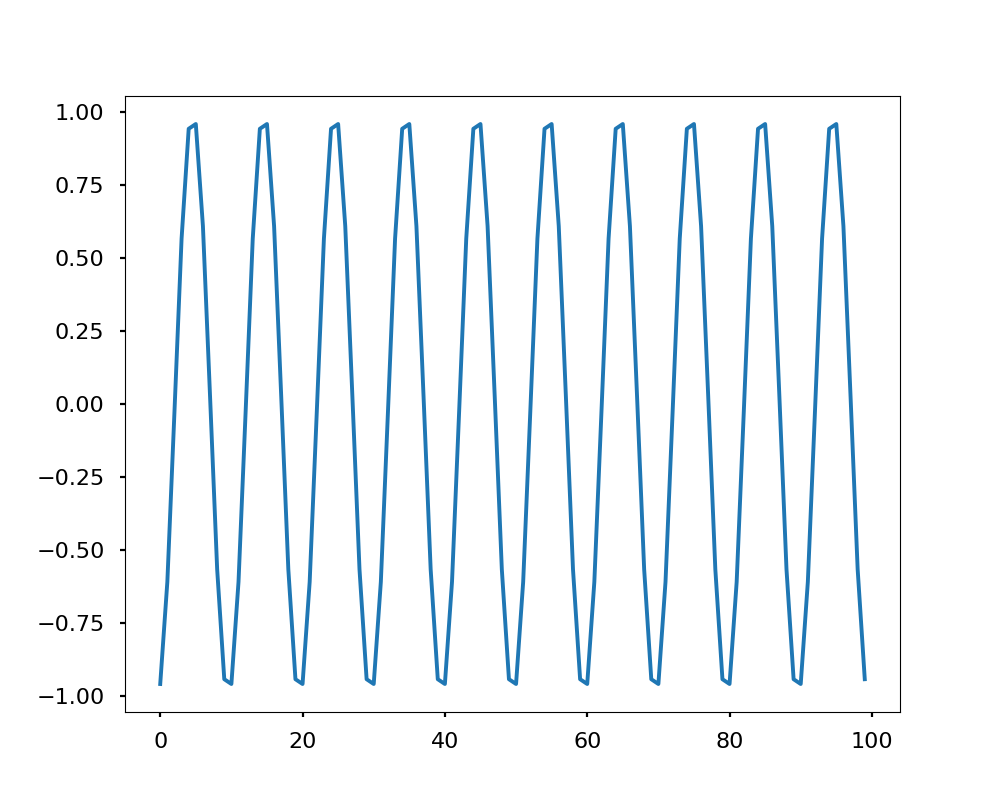

In [2]:
Fs = 1  # sampling rate
Ts = 1.0/Fs # sampling interval
t = np.arange(0,100,Ts) # time vector
ff = 0.1;   # frequency of the signal
# create the signal
y = np.sin(2*np.pi*ff*t + 5)

plt.figure(figsize = (10, 8))
plt.plot(t, y)
plt.show()

In [3]:
# get the autocorrelation coefficient
acf = sm.tsa.acf(y, nlags=len(y))

Text(0, 0.5, 'Autocorrelation')

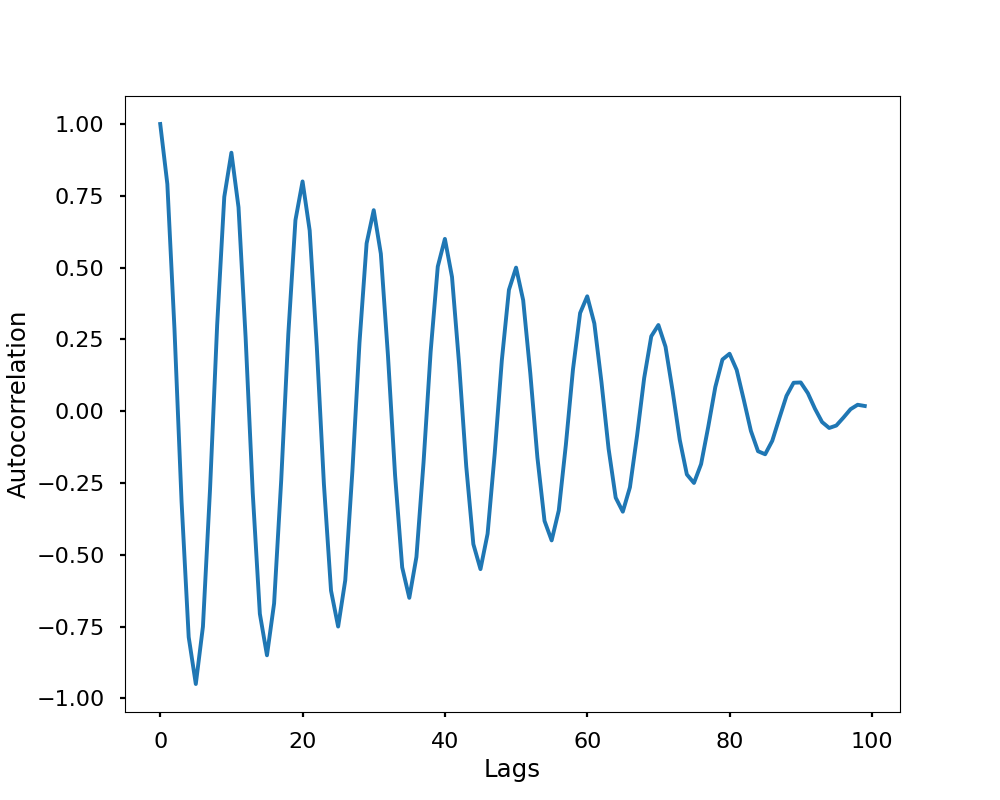

In [4]:
plt.figure(figsize = (10, 8))
lag = np.arange(len(y))
plt.plot(lag, acf)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

In [5]:
def nextpow2(i):
    '''
    Find the next power 2 number for FFT
    '''
    
    n = 1
    while n < i: n *= 2
    return n

def shift_signal_in_frequency_domain(datin, shift):
    '''
    This is function to shift a signal in frequency domain. 
    The idea is in the frequency domain, 
    we just multiply the signal with the phase shift. 
    '''
    Nin = len(datin) 
    
    # get the next power 2 number for fft
    N = nextpow2(Nin +np.max(np.abs(shift)))
    
    # do the fft
    fdatin = np.fft.fft(datin, N)
    
    # get the phase shift for the signal, shift here is D in the above explaination
    ik = np.array([2j*np.pi*k for k in xrange(0, N)]) / N 
    fshift = np.exp(-ik*shift)
        
    # multiple the signal with the shift and transform it back to time domain
    datout = np.real(np.fft.ifft(fshift * fdatin))
    
    # only get the data have the same length as the input signal
    datout = datout[0:Nin]
    
    return datout

In [6]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

NameError: name 'xrange' is not defined

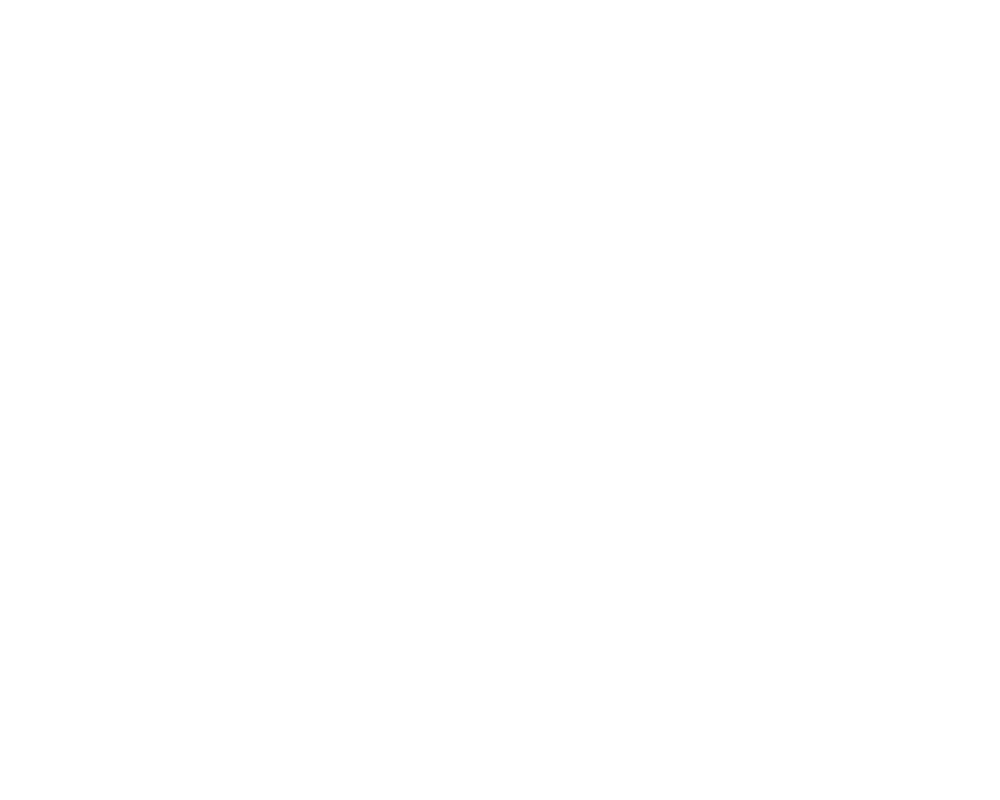

In [7]:
lags = []
acfs = []
norm = np.dot(y, y)
fig = plt.figure(figsize = (10, 8))
n_frame = len(y)

def updatefig(i):
    '''
    a simple helper function to plot the two figures we need, 
    the top panel is the time domain signal with the red signal
    showing the shifted signal. The bottom figure is the one
    corresponding to the autocorrelation from the above figure. 
    '''
    fig.clear()
    # shift signal
    y_shift = shift_signal_in_frequency_domain(y, i)
    plt.subplot(211)
    plt.plot(t, y, 'b')
    plt.plot(t, y_shift, 'r')
    plt.ylabel('Amplitude')
    plt.title('Lag: ' + str(i))

    plt.subplot(212)
    # get the lag
    lags.append(i)
    # simple way to calculate autocorrelation
    acf = np.dot(y_shift, y)
    # add to the list with normalized value. 
    acfs.append(acf/norm)
    plt.plot(lags, acfs)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.xlim(0, n_frame)
    plt.ylim(-1, 1)
    plt.draw()

# save the movie to file
anim = manimation.FuncAnimation(fig, updatefig, n_frame)
anim.save("./autocorrelation_example.mp4", fps=10, dpi = 300)

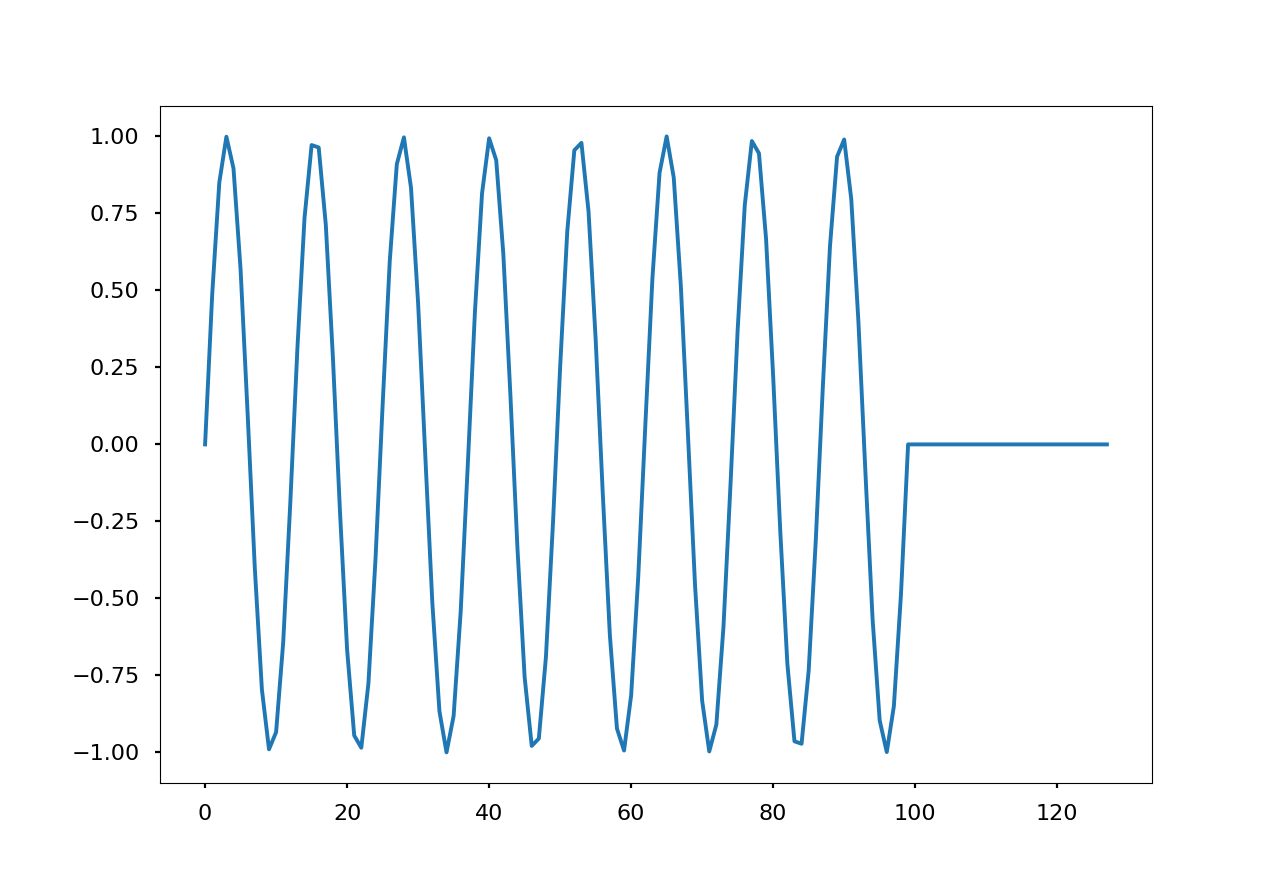

In [4]:
%matplotlib widget
fig, ax = plt.subplots(1)

N = 100
period = 2.0 * np.pi
omega = 2.0 * np.pi / period
t = np.linspace(0, 8*period, N)
f = np.sin(omega * t)
F = np.fft.fft(f, 128)
f2 = np.fft.ifft(F).real
# f2 = f2[:N]

# plt.plot(t, f)
# plt.plot(t, f2)
plt.plot(f2)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.animation import FuncAnimation

# Generate a random signal
np.random.seed(42)
signal = np.random.randn(200)

# Compute autocorrelation
autocorr = np.correlate(signal, signal, mode='full')

# Prepare the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, len(signal))
ax.set_ylim(-10, 10)

# Initialize the line plot
line, = ax.plot([], [], lw=2)

# Update function for the animation
def update(frame):
    shifted_autocorr = np.roll(autocorr, frame - len(signal))
    line.set_data(np.arange(len(shifted_autocorr)), shifted_autocorr)
    ax.set_title(f'Autocorrelation at Lag {frame - len(signal)}')
    return line,

# Create the animation
animation = FuncAnimation(fig, update, frames=2 * len(signal), interval=200)

# Create a directory to store the frames
os.makedirs('frames', exist_ok=True)

# Save each frame as an image
for i, frame in enumerate(animation.new_frame_seq()):
    animation.new_frame_seq()
    fig.savefig(f'frames/frame_{i:03d}.png')
    plt.close(fig)

# Create a video from the frames
output_file = 'autocorrelation.mp4'

# Use ffmpeg to convert frames to video
os.system(f'ffmpeg -r 10 -i frames/frame_%03d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p {output_file}')

# Clean up the frames directory
for i in range(len(signal)):
    os.remove(f'frames/frame_{i:03d}.png')

print(f'Video saved as {output_file}')


/Users/yairmau/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-lib